In [2]:
!pip install astroML

     |████████████████████████████████| 112kB 2.8MB/s 
  Created wheel for astroML: filename=astroML-0.4.1-cp36-none-any.whl size=128663 sha256=feeeecd059be973fe80edf35fd44976a5decd047773e8479d94c21a323989609
  Stored in directory: /root/.cache/pip/wheels/7c/f2/f3/eb817cfb31b4445358dd7dda2434e02003f72801edabc38c97
Successfully built astroML


In [0]:
import numpy as np

from astroML.datasets import fetch_nasa_atlas

data = fetch_nasa_atlas()

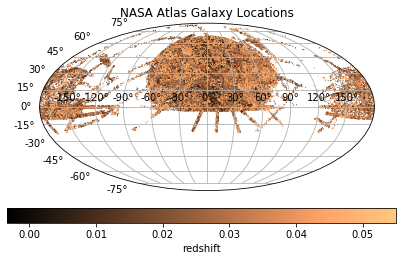

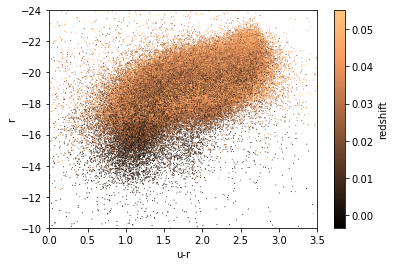

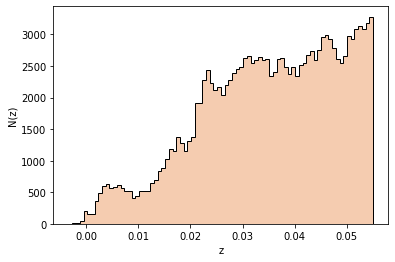

In [4]:

from matplotlib import pyplot as plt

from astropy.visualization import hist

#------------------------------------------------------------
# plot the RA/DEC in an area-preserving projection

RA = data['RA']
DEC = data['DEC']

# convert coordinates to degrees
RA -= 180
RA *= np.pi / 180
DEC *= np.pi / 180

ax = plt.axes(projection='mollweide')
plt.scatter(RA, DEC, s=1, c=data['Z'], cmap=plt.cm.copper,
            edgecolors='none', linewidths=0)
plt.grid(True)

plt.title('NASA Atlas Galaxy Locations')
cb = plt.colorbar(cax=plt.axes([0.05, 0.1, 0.9, 0.05]),
                  orientation='horizontal',
                  ticks=np.linspace(0, 0.05, 6))
cb.set_label('redshift')


#------------------------------------------------------------
# plot the r vs u-r color-magnitude diagram

absmag = data['ABSMAG']

u = absmag[:, 2]
r = absmag[:, 4]

plt.figure()
ax = plt.axes()
plt.scatter(u - r, r, s=1, lw=0, c=data['Z'], cmap=plt.cm.copper)
plt.colorbar(ticks=np.linspace(0, 0.05, 6)).set_label('redshift')

plt.xlim(0, 3.5)
plt.ylim(-10, -24)

plt.xlabel('u-r')
plt.ylabel('r')

#------------------------------------------------------------
# plot a histogram of the redshift

plt.figure()
hist(data['Z'], bins='knuth',
     histtype='stepfilled', ec='k', fc='#F5CCB0')
plt.xlabel('z')
plt.ylabel('N(z)')

plt.show()